Analyzing Population Census 2023 for Sindh. The preliminary aim of this analysis at the start is:

1. compare the land and population ratios of different districts in Sindh. 
2. Take average of all the Average household size, and come up with districts that are above and below the average household size of the province.

In [49]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Reading the data from the csv file and calling the head of the csv file

pop_data = pd.read_csv('pop_data.csv')

# Converting the entire text in the data in lower case

pop_data = pop_data.apply(lambda x: x.astype(str).str.lower() if x.dtype == "object" else x)
pop_data.head()

,name_admin_unit,admin_unit,part_of_district,region,area_sqkm,all_sexes,male,female,tgend,sex_ratio,pop_den_sqkm,urban_prop,avg_hh_size,pop_2017,avg_annual_gr_rate_17_23
0,badin,district,badin,overall,6858.0,1947081.0,1012854.0,934153.0,74.0,108.42,283.91,22.08,4.8,1804958.0,1.27
1,badin,district,badin,rural,NaN,1517232.0,790028.0,727169.0,35.0,108.64,NaN,NaN,4.8,1414614.0,1.18
2,badin,district,badin,urban,NaN,429849.0,222826.0,206984.0,39.0,107.65,NaN,NaN,5.0,390344.0,1.62
3,dadu,district,dadu,overall,7866.0,1742320.0,883793.0,858441.0,86.0,102.95,221.50,25.20,5.1,1550390.0,1.97
4,dadu,district,dadu,rural,NaN,1303286.0,662867.0,640382.0,37.0,103.51,NaN,NaN,5.0,1166984.0,1.86


In [51]:
# Cleaning the data first by only keeping the rows with region == overall. Then, removing the columns that will not be used for analysis. 

pop_data = pop_data[pop_data['region'] == 'overall']
pop_data = pop_data.drop(['admin_unit', 'part_of_district', 'region'], axis=1)

# Rename the two tando muhammad khan into tando muhammad khan 1 and tando muhammad khan 2

mask = pop_data['name_admin_unit'] == 'tando muhammad khan'
pop_data.loc[mask, 'name_admin_unit'] = ['tando muhammad khan I', 'tando muhammad khan II']

There are two tando muhammad khan in the Sindh province.

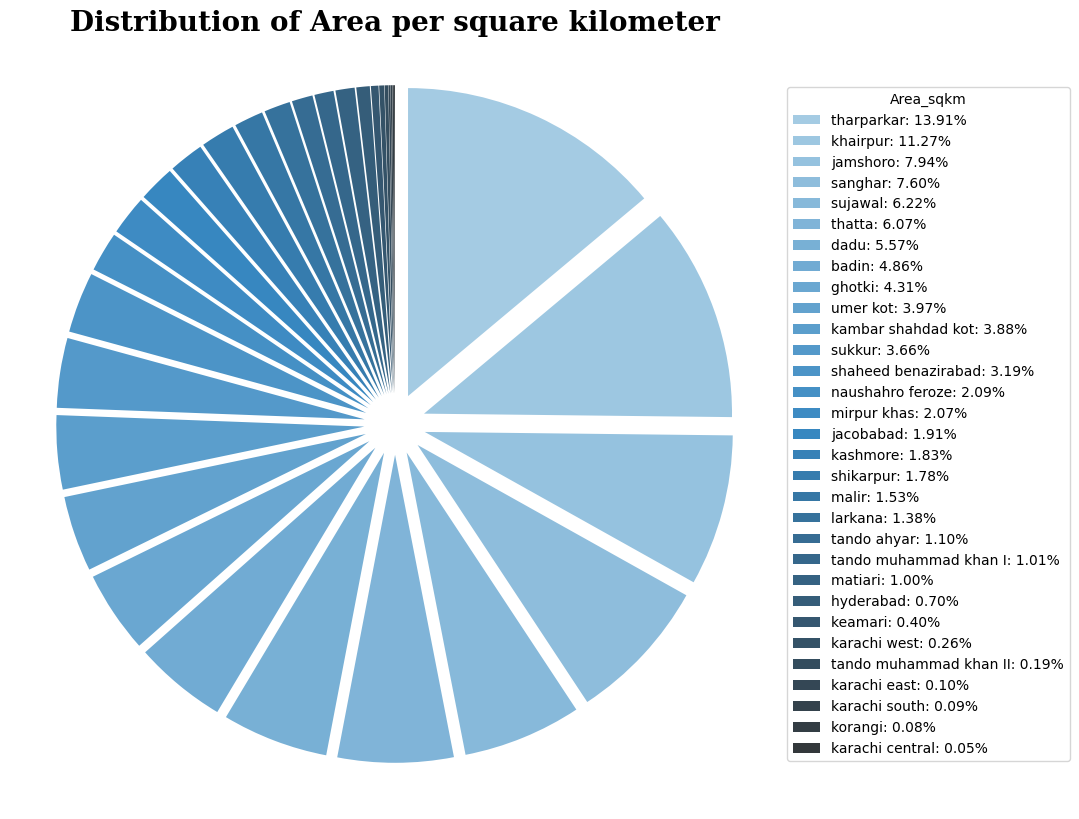

In [52]:
# Find the ratio of each area_sqkm to the total area_sqkm

total_area = pop_data['area_sqkm'].sum()
pop_data['area_ratio'] = (pop_data['area_sqkm'] / total_area) * 100

# Making a pie chart to show the distribution of area_sqkm

sorted_data = pop_data.sort_values(by='area_ratio', ascending=False)
colors = sns.color_palette('Blues_d', len(sorted_data['area_ratio']))
explode = [0.1] * len(sorted_data['area_ratio'])

plt.figure(figsize=(10, 10))
plt.pie(sorted_data['area_ratio'], colors=colors, startangle=90, counterclock=False, explode=explode)
plt.title('Distribution of Area per square kilometer', fontsize=20, fontfamily='serif', fontweight='bold')
plt.legend([f"{name}: {ratio:.2f}%" for name, ratio in zip(sorted_data['name_admin_unit'], sorted_data['area_ratio'])],
           title='Area_sqkm', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

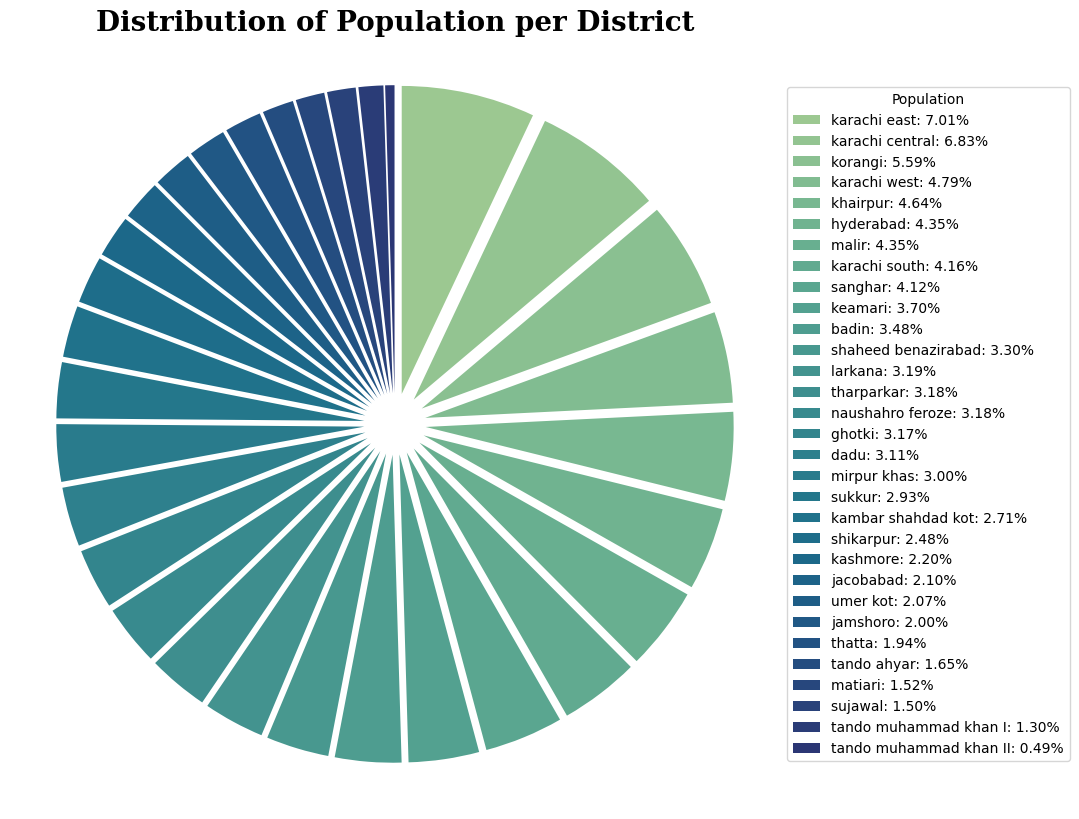

In [53]:
# Find the ratio of each population to the total population

total_population = pop_data['all_sexes'].sum()
pop_data['population_ratio'] = (pop_data['all_sexes'] / total_population) * 100

# Making a pie chart to show the distribution of population per district

sorted_data = pop_data.sort_values(by='population_ratio', ascending=False)
colors = sns.color_palette('crest', len(sorted_data['population_ratio']))
explode = [0.1] * len(sorted_data['population_ratio'])

plt.figure(figsize=(10, 10))
plt.pie(sorted_data['population_ratio'], colors=colors, startangle=90, counterclock=False, explode=explode)
plt.title('Distribution of Population per District', fontsize=20, fontfamily='serif', fontweight='bold')
plt.legend([f"{name}: {ratio:.2f}%" for name, ratio in zip(sorted_data['name_admin_unit'], sorted_data['population_ratio'])],
           title='Population', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Average household size of different districts, and what districts stand out with bigger household sizes? 

In [54]:
# Take the average of all average household size for each district

average_household_size_all_districts = (pop_data["avg_hh_size"].sum() / len(pop_data["avg_hh_size"]))
print("The average household size for all the districts is", average_household_size_all_districts.round(2))

# Find the number and names of districts that have an average household size greater than the average household size of all districts

districts_greater_than_average = pop_data[pop_data["avg_hh_size"] > average_household_size_all_districts]
number_of_districts_greater_than_average = len(districts_greater_than_average)
names_of_districts_greater_than_average = districts_greater_than_average["name_admin_unit"].values
print("The number of districts that have an average household size greater than the average household size of all districts is", number_of_districts_greater_than_average, "out of", len(pop_data["avg_hh_size"]))
print("The names of the districts that have an average household size greater than the average household size of all districts are", names_of_districts_greater_than_average)

The average household size for all the districts is 5.53
The number of districts that have an average household size greater than the average household size of all districts is 13 out of 31
The names of the districts that have an average household size greater than the average household size of all districts are ['jacobabad' 'kambar shahdad kot' 'karachi central' 'karachi east'
 'karachi west' 'kashmore' 'keamari' 'khairpur' 'korangi' 'malir'
 'sanghar' 'shikarpur' 'sukkur']


We will now read the housing data. 

In [55]:
# Reading the data from the csv file and calling the head of the csv file

house_data = pd.read_csv('housing_data.csv')

# Converting the entire text in the data in lower case

house_data = house_data.apply(lambda x: x.astype(str).str.lower() if x.dtype == "object" else x)
house_data.head()

,name_admin_unit,part_of_district,admin_unit,hh_type,overall,rural,urban
0,badin,badin,district,kacha,282437,249889.0,32548
1,badin,badin,district,pakka,87240,43693.0,43547
2,badin,badin,district,semi pakka,28215,18367.0,9848
3,badin,badin,district,total,397892,311949.0,85943
4,dadu,dadu,district,kacha,180719,168136.0,12583


In [56]:
# Removing the columns that will not be used for analysis. 

house_data = house_data[house_data['hh_type'].isin(['kacha', 'pakka', 'semi pakka'])]
house_data = house_data.drop(['admin_unit', 'part_of_district', 'rural', 'urban'], axis=1)
house_data

,name_admin_unit,hh_type,overall
0,badin,kacha,282437
1,badin,pakka,87240
2,badin,semi pakka,28215
4,dadu,kacha,180719
5,dadu,pakka,104661
...,...,...,...
113,thatta,pakka,71592
114,thatta,semi pakka,11267
116,umer kot,kacha,148169
117,umer kot,pakka,59498


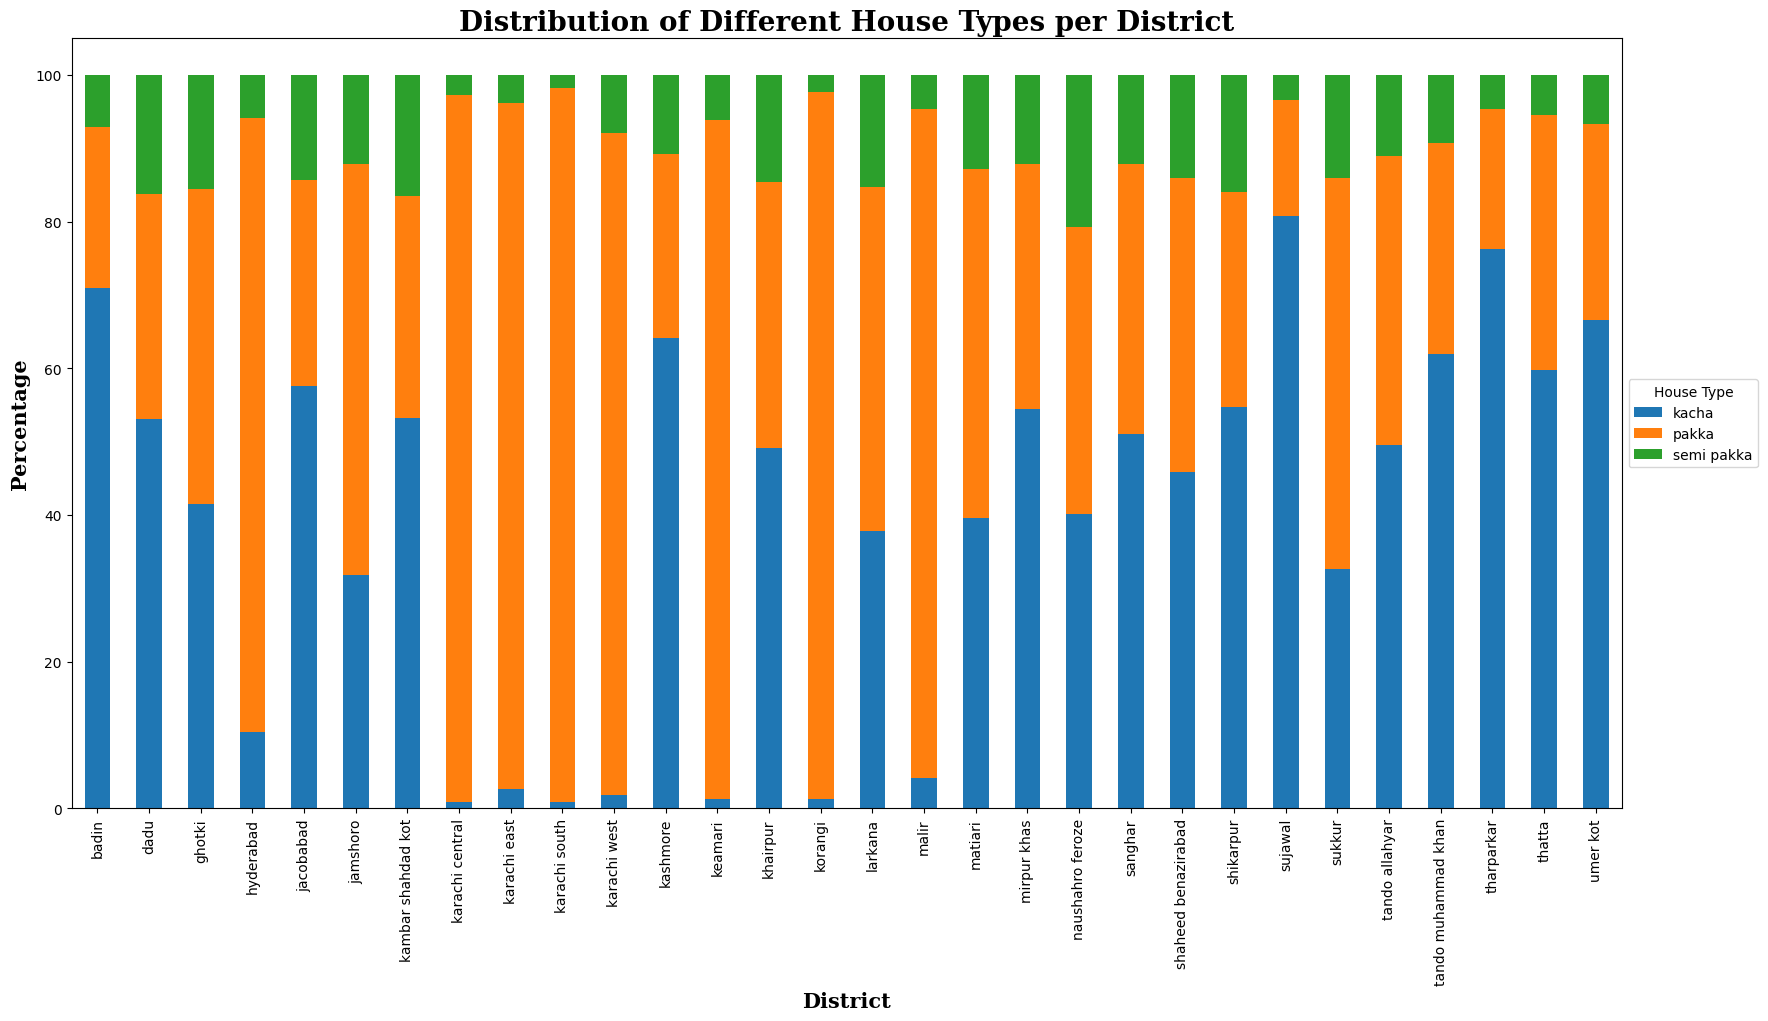

In [57]:
# Find the ratio of different house types to the total for each district

house_data['total'] = house_data.groupby('name_admin_unit')['overall'].transform('sum')
house_data['ratio'] = (house_data['overall'] / house_data['total']) * 100
house_data_pivot = house_data.pivot(index='name_admin_unit', columns='hh_type', values='ratio')

# Making a stacked bar chart to show the distribution of different house types per district

house_data_pivot.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Distribution of Different House Types per District', fontsize=20, fontfamily='serif', fontweight='bold')
plt.xlabel('District', fontsize=15, fontfamily='serif', fontweight='bold')
plt.ylabel('Percentage', fontsize=15, fontfamily='serif', fontweight='bold')
plt.legend(title='House Type', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

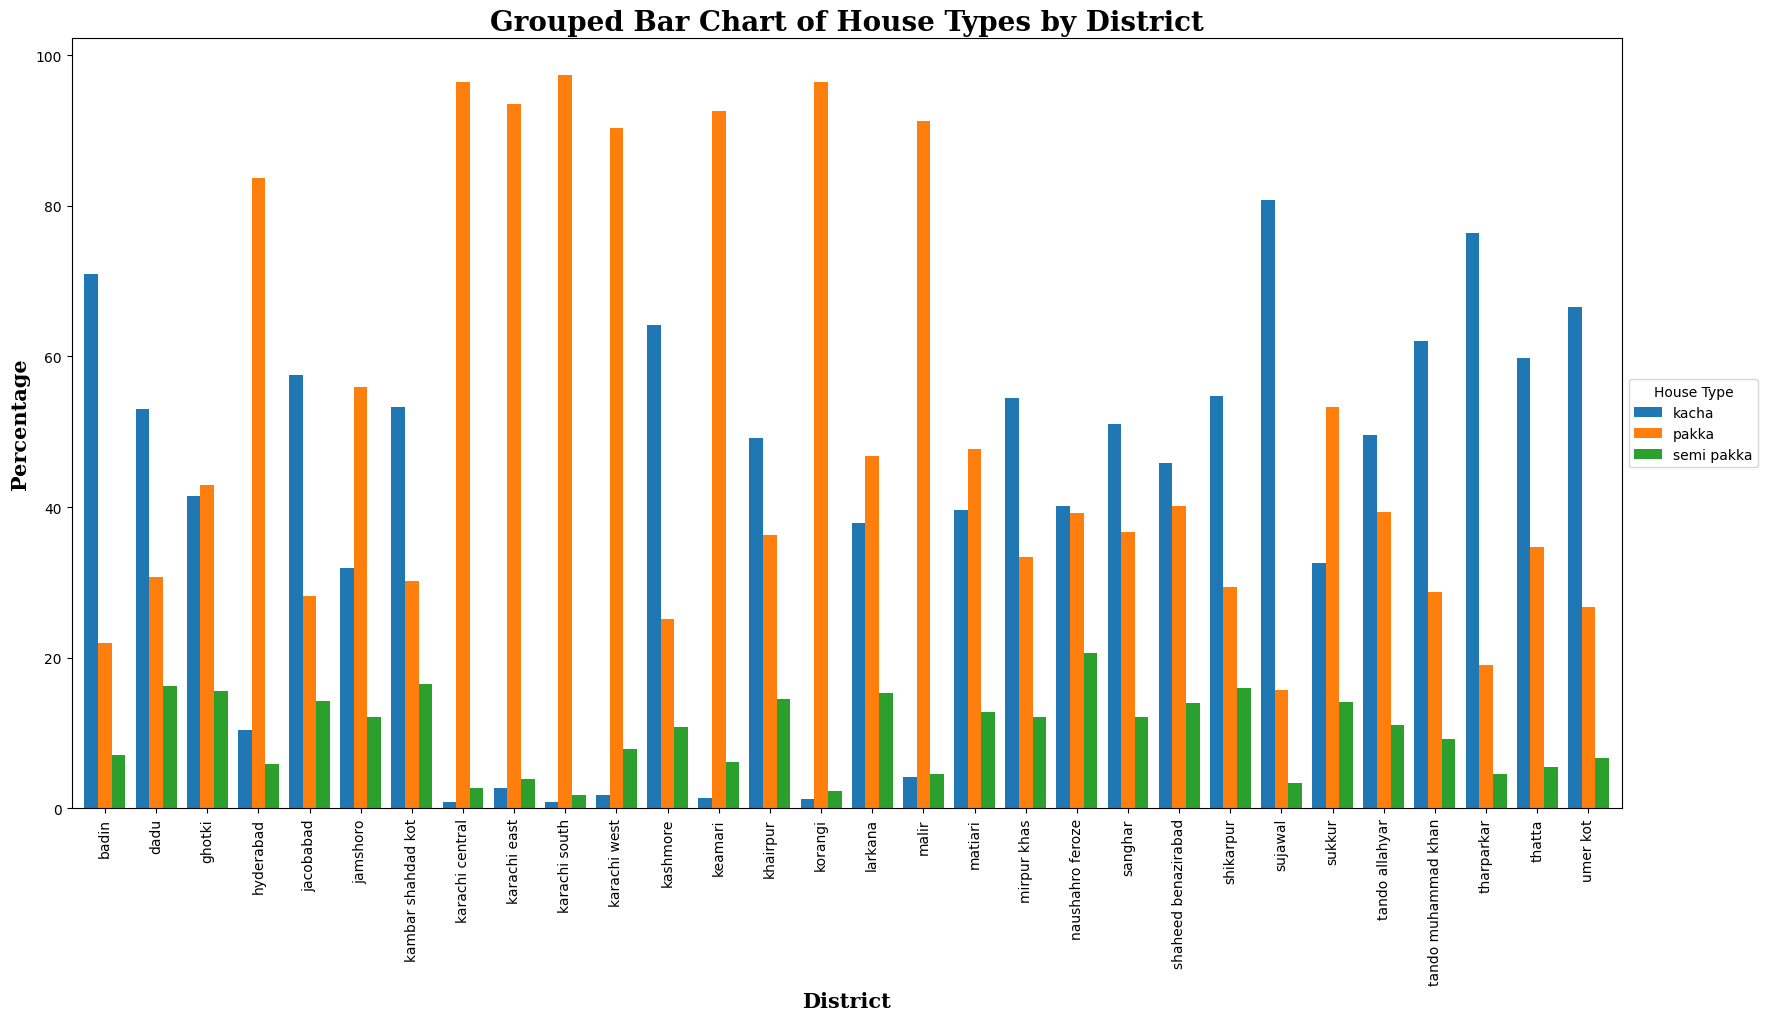

In [58]:
house_data_pivot.plot(kind='bar', figsize=(20, 10), width=0.8)
plt.title('Grouped Bar Chart of House Types by District', fontsize=20, fontfamily='serif', fontweight='bold')
plt.xlabel('District', fontsize=15, fontfamily='serif', fontweight='bold')
plt.ylabel('Percentage', fontsize=15, fontfamily='serif', fontweight='bold')
plt.legend(title='House Type', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

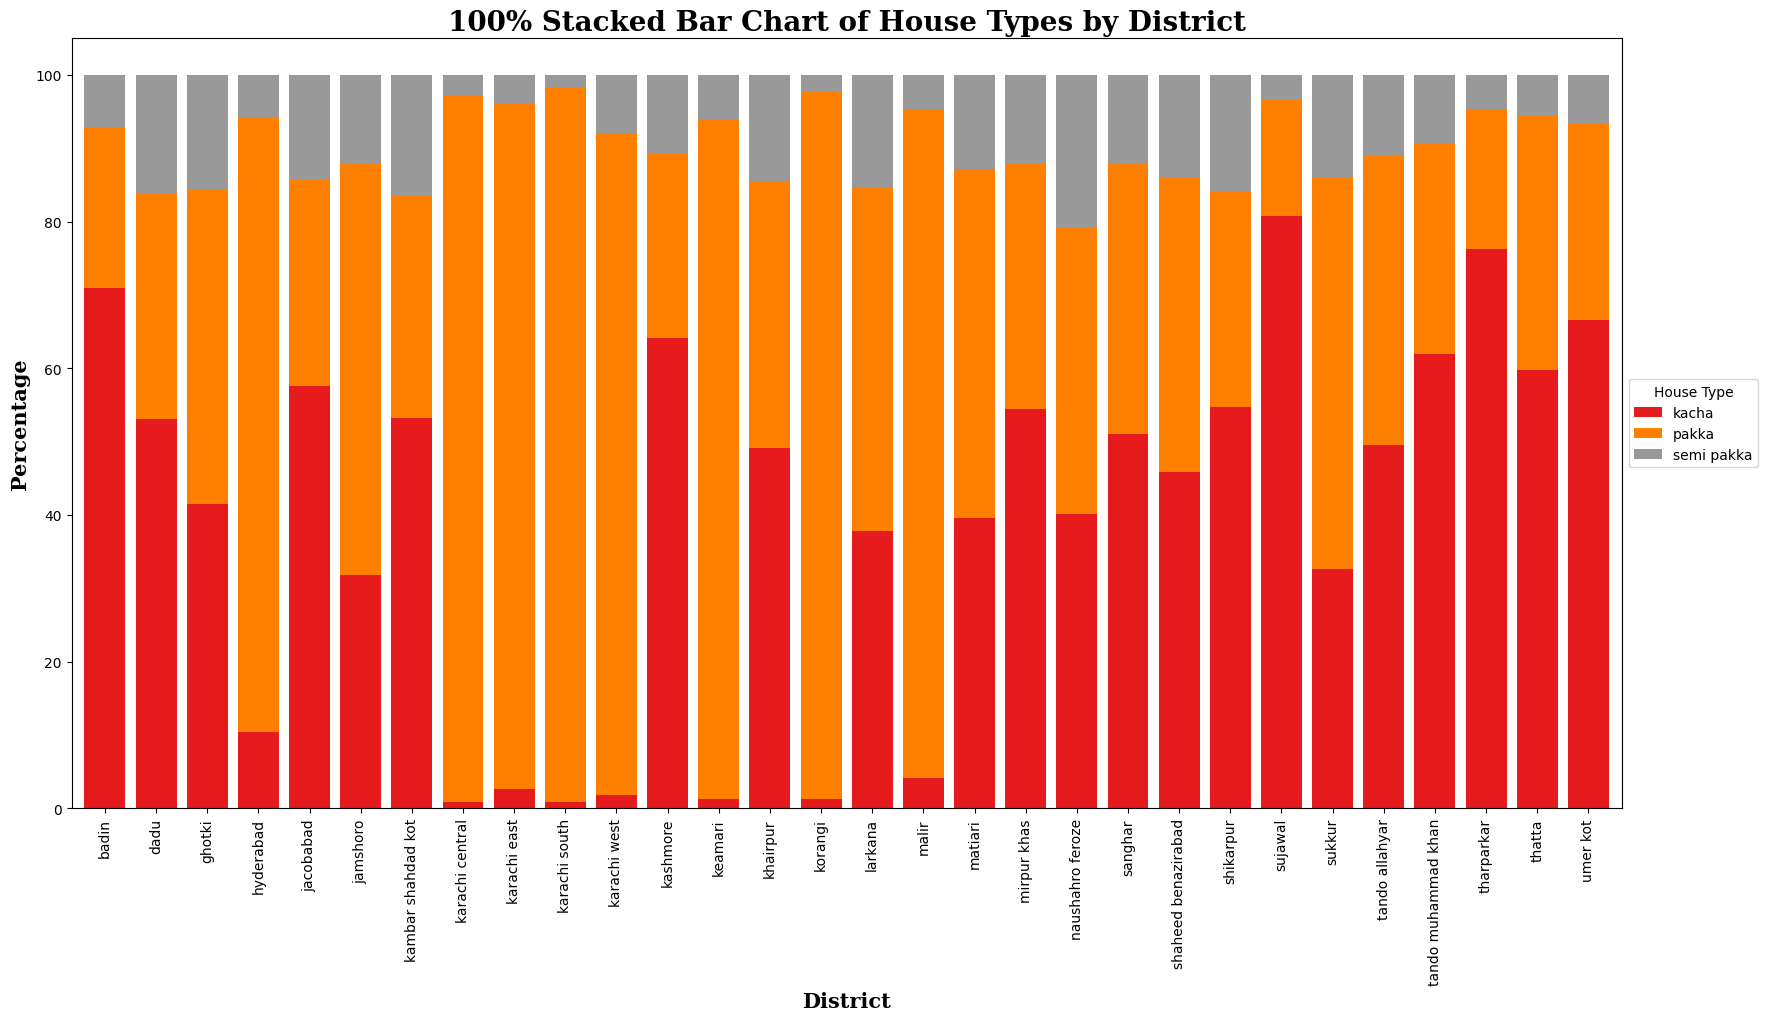

In [59]:
house_data_pivot.plot(kind='bar', stacked=True, figsize=(20, 10), 
                      width=0.8, colormap='Set1')
plt.title('100% Stacked Bar Chart of House Types by District', fontsize=20, fontfamily='serif', fontweight='bold')
plt.xlabel('District', fontsize=15, fontfamily='serif', fontweight='bold')
plt.ylabel('Percentage', fontsize=15, fontfamily='serif', fontweight='bold')
plt.legend(title='House Type', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

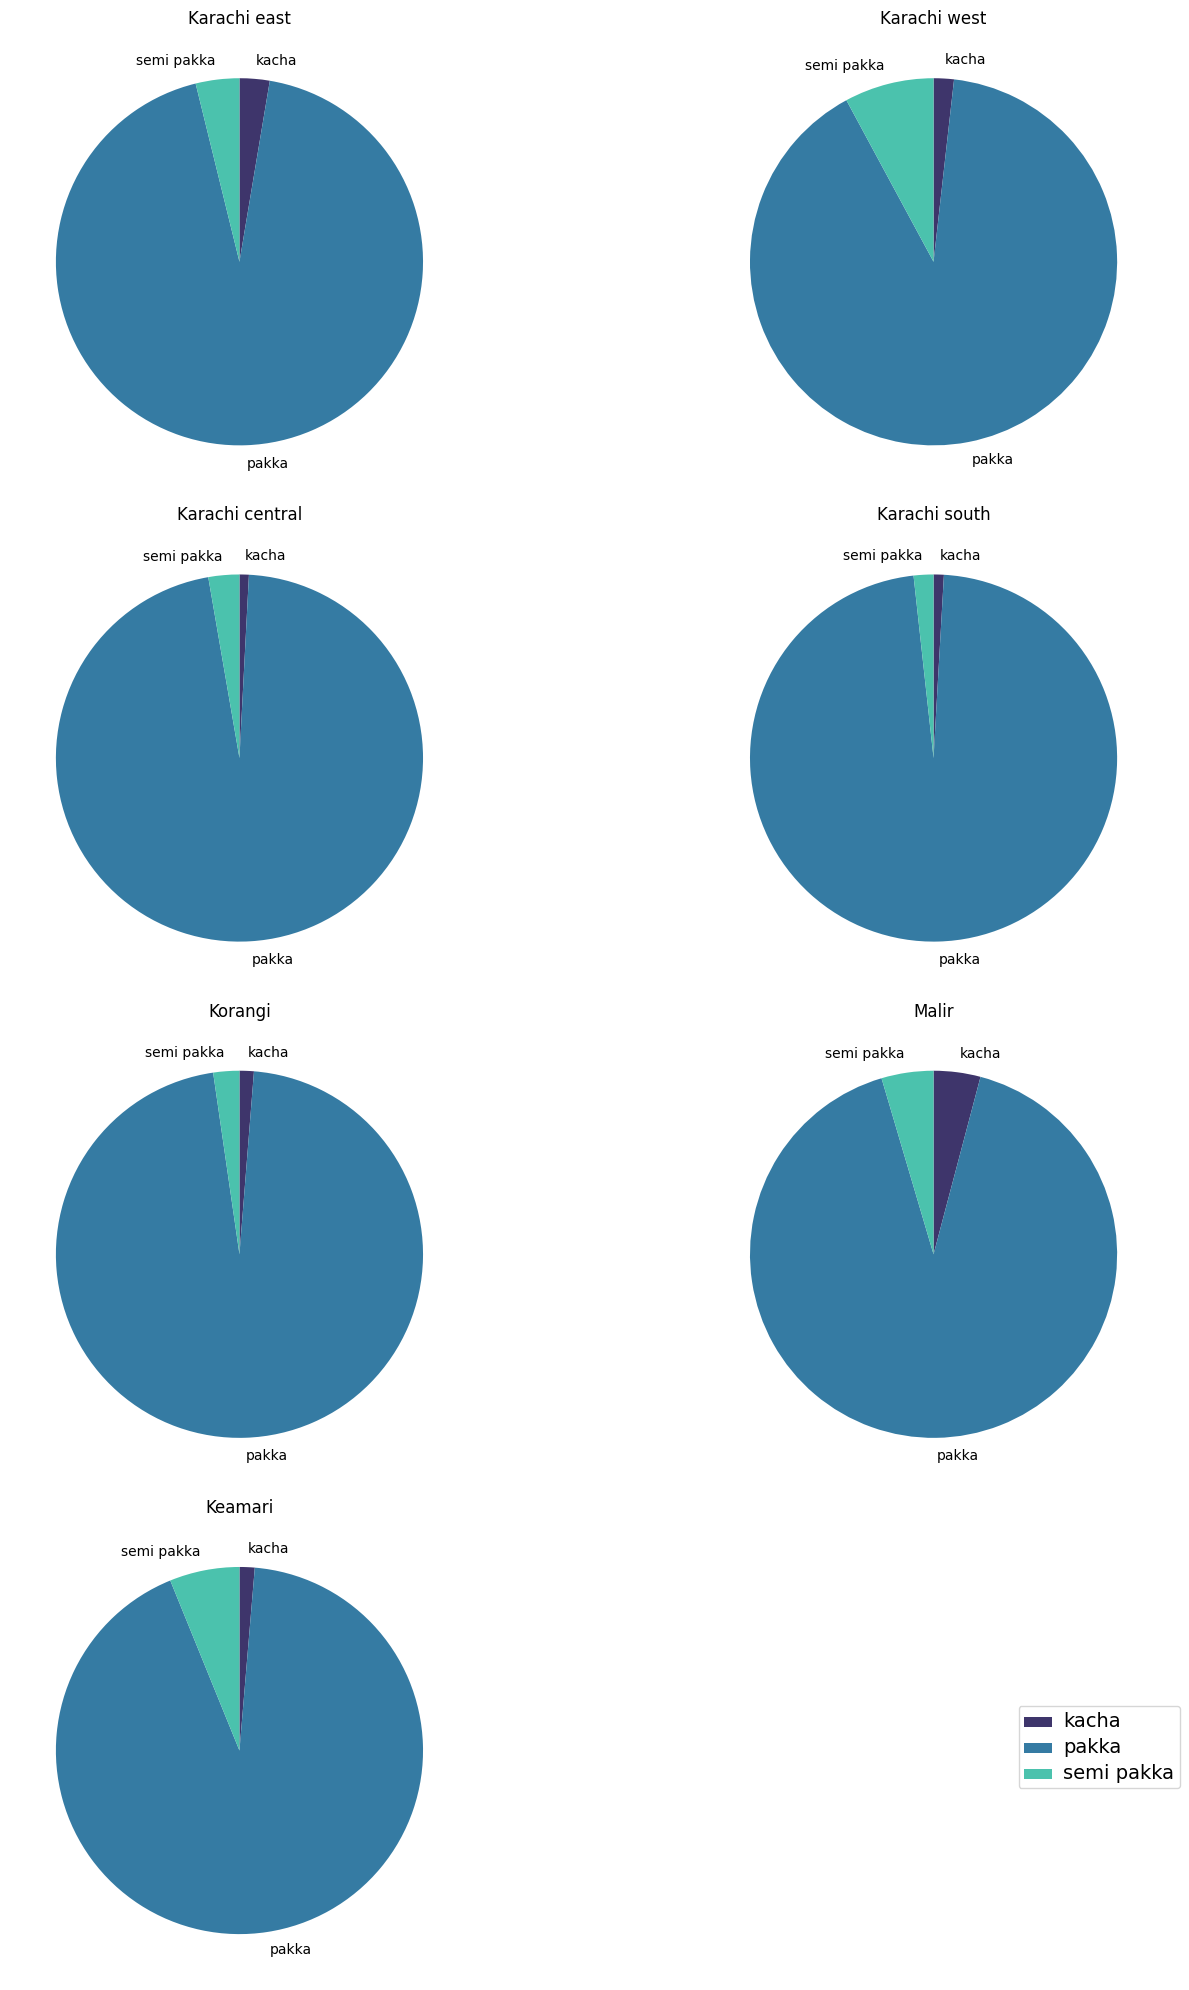

In [100]:
# Creating pie-charts for the following districts: karachi east, karachi west, karachi central, karachi south, korangi, malir, and keamari

districts = ['karachi east', 'karachi west', 'karachi central', 'karachi south', 'korangi', 'malir', 'keamari']
colors = sns.color_palette('mako', 3)
# colors = ['#003C71', '#FF6F61', '#F1C40F']  # Cobalt blue and coral colors
# colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA']  # Soft pastel colors

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, district in enumerate(districts):
    data = house_data[house_data['name_admin_unit'] == district]
    data = data.groupby('hh_type')['overall'].sum()
    data = data.reindex(['kacha', 'pakka', 'semi pakka'])  # Ensure the order of house types
    data.plot(kind='pie', colors=colors, startangle=90, counterclock=False, ax=axes[i], autopct=None)  # Remove percentage labels
    axes[i].set_ylabel('')  # Remove y-label
    axes[i].set_title(district.capitalize())  # Set the title to the district name

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a legend for the colors with increased size
legend = fig.legend(['kacha', 'pakka', 'semi pakka'], loc='lower right', bbox_to_anchor=(0.9, 0.1))
for text in legend.get_texts():
    text.set_fontsize(14)  # Increase the font size of the legend

plt.tight_layout()
plt.show()

Let us analyze the patterns of literacy rates now

In [60]:
# read the csv containing literacy data

lit_data = pd.read_csv('literacy_data.csv')
lit_data = lit_data.apply(lambda x: x.astype(str).str.lower() if x.dtype == "object" else x)
lit_data.head()

,name_admin_unit,part_of_district,admin_unit,vars,all_sexes_overall,male_overall,female_overall,tgend_overall,all_sexes_rural,male_rural,female_rural,tgend_rural,all_sexes_urban,male_urban,female_urban,tgend_urban
0,badin,badin,district,population >=5,1634553.00,851965.00,782514.0,74.00,1266627.00,661001.00,605591.0,35.00,367926.00,190964.00,176923.00,39.00
1,badin,badin,district,population >=10,1319868.00,686776.00,633018.0,74.00,1014278.00,528274.00,485969.0,35.00,305590.00,158502.00,147049.00,39.00
2,badin,badin,district,literate >=10,483693.00,319073.00,164601.0,19.00,319681.00,219561.00,100112.0,8.00,164012.00,99512.00,64489.00,11.00
3,badin,badin,district,literate %,36.65,46.46,26.0,25.68,31.52,41.56,20.6,22.86,53.67,62.78,43.86,28.21
4,badin,badin,district,ever attended,537883.00,363222.00,174644.0,17.00,352365.00,248905.00,103454.0,6.00,185518.00,114317.00,71190.00,11.00


In [61]:
# Cleaning the data and only keeping rows with vars == "literate %"

lit_data = lit_data[lit_data['vars'] == 'literate %']
lit_data = lit_data.drop(['vars','part_of_district','admin_unit'], axis=1)

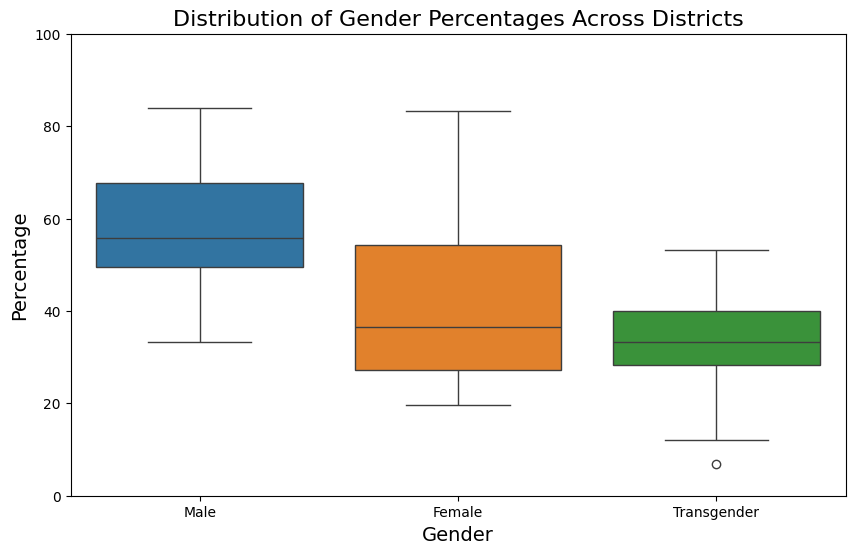

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=lit_data[['male_overall', 'female_overall', 'tgend_overall']], orient='v')
plt.title('Distribution of Gender Percentages Across Districts', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.ylim(0, 100)
plt.xticks([0, 1, 2], ['Male', 'Female', 'Transgender'], fontsize=10)
plt.show()

In [63]:
# Finding the outlier in the boxplot for Transgender

# Extract the transgender data
transgender_data = lit_data['tgend_overall']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = transgender_data.quantile(0.25)
Q3 = transgender_data.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = transgender_data[(transgender_data < lower_bound) | (transgender_data > upper_bound)]
outlier_district = lit_data[lit_data['tgend_overall'].isin(outliers)]['name_admin_unit'].values
print("Outliers in the transgender data:", outliers.values)
print("Districts with outliers in the transgender data:", outlier_district)


Outliers in the transgender data: [6.82]
Districts with outliers in the transgender data: ['thatta']


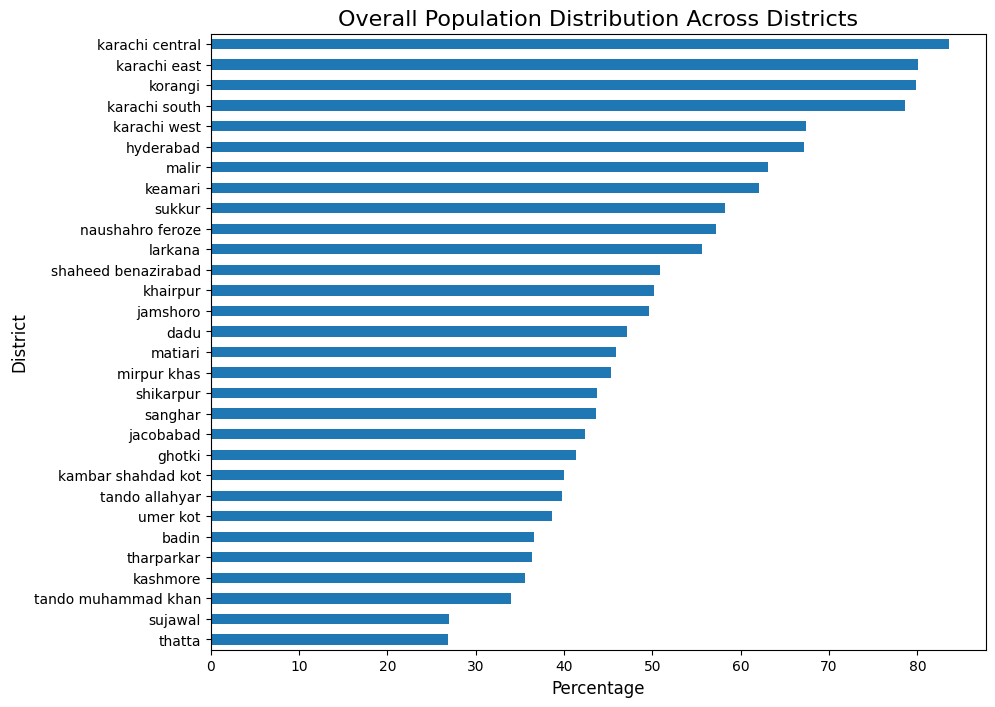

In [64]:
# Sort by 'all_sexes_overall' to show districts from lowest to highest
sorted_data = lit_data.sort_values('all_sexes_overall')

# Plot horizontal bar chart
sorted_data.plot(kind='barh', x='name_admin_unit', y='all_sexes_overall', figsize=(10, 8))
plt.title('Overall Population Distribution Across Districts', fontsize=16)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.legend().remove()
plt.show()

Modeling the population growth rate for the province of Sindh and compare it with the population growth rate of Pakistan. 

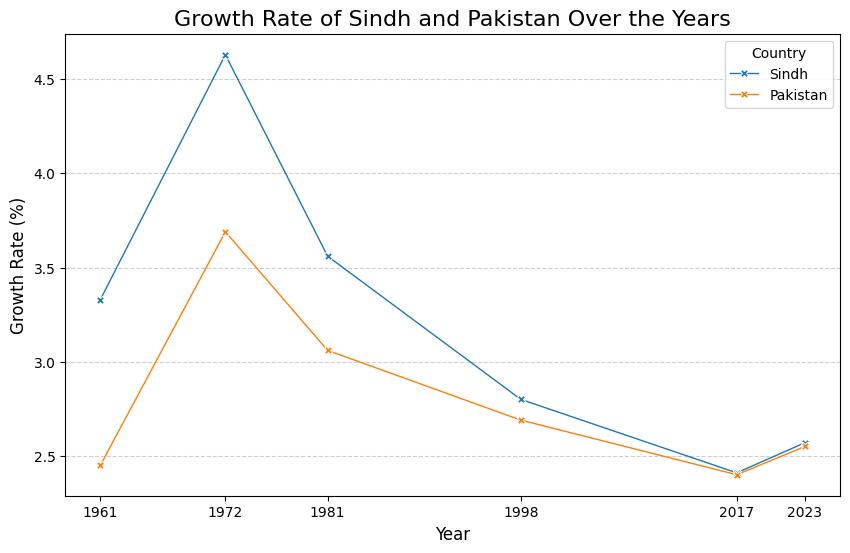

In [65]:
Sindh_growth = {1961: 3.33, 1972: 4.63, 1981: 3.56, 1998: 2.80, 2017: 2.41, 2023: 2.57}
Pakistan_growth = {1961: 2.45, 1972: 3.69, 1981: 3.06, 1998: 2.69, 2017: 2.40, 2023: 2.55}

# Merge the two dictionaries into a DataFrame
growth_data = pd.DataFrame({
    'Year': list(Sindh_growth.keys()),
    'Sindh': list(Sindh_growth.values()),
    'Pakistan': list(Pakistan_growth.values())
})

# Plot the growth rate of Sindh and Pakistan over the years using a line graph

plt.figure(figsize=(10, 6))
sns.lineplot(data=growth_data, x='Year', y='Sindh', marker='X', label='Sindh', linestyle='-', linewidth=1)
sns.lineplot(data=growth_data, x='Year', y='Pakistan', marker='X', label='Pakistan', linestyle='-', linewidth=1)
plt.title('Growth Rate of Sindh and Pakistan Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.xticks(growth_data['Year'])  # Set x-axis ticks to the exact years in the data
plt.legend(title='Country', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Dividing the percentage of landmass of the province and federal capital of Pakistan. 

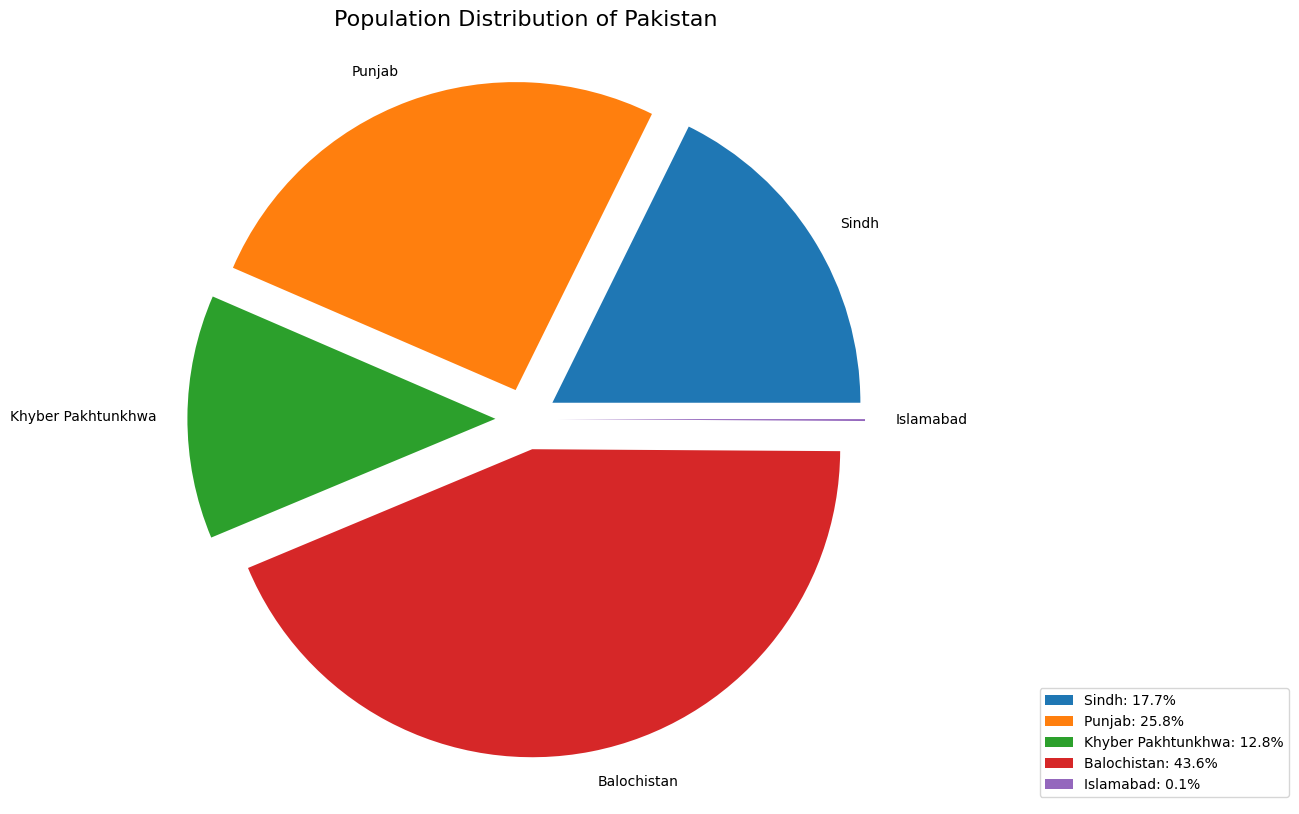

In [68]:
Sindh = round((140914 / 796096) * 100, 1)
Punjab = round((205345 / 796096) * 100, 1)
Khyber = round((101741 / 796096) * 100, 1)
Balochistan = round((347190 / 796096) * 100, 1)
Islamabad = round((906 / 796096) * 100, 1)

# Pie chart to show the population distribution of Pakistan

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

plt.figure(figsize=(10, 10))
plt.pie([Sindh, Punjab, Khyber, Balochistan, Islamabad], labels=['Sindh', 'Punjab', 'Khyber Pakhtunkhwa', 'Balochistan', 'Islamabad'], explode = explode)
plt.title('Population Distribution of Pakistan', fontsize=16)
plt.legend([f"{name}: {ratio:.1f}%" for name, ratio in zip(['Sindh', 'Punjab', 'Khyber Pakhtunkhwa', 'Balochistan', 'Islamabad'], [Sindh, Punjab, Khyber, Balochistan, Islamabad])], loc='lower right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()